In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd 

# 1. Feladat

In [111]:
# 1. feladat
# == értékek felvitele ==
Név = 'Kiss Bendegúz Barnabás'
Neptun_kód = 'LKYEOR'
randint = 42

# == a neptunkód ellenőrzése ==
if len(Neptun_kód) != 6 or Neptun_kód.upper() != Neptun_kód: #6tagú?, nagybetűvel írt?
    print(f'A {Neptun_kód} Helytelen Neptun kód! A Neptun kódnak 6 karakterből kell állnia és végig nagybetűnek kell lennie!')
else:
    print(f'A {Neptun_kód} Neptun kód megfelelő!')

# == a stringek felbontása ==
list_Név = list(Név)
list_Neptun_kód = list(Neptun_kód)

# == feladat által közölt módosítások ==
del list_Név[3]
del list_Neptun_kód[-1]
list_Neptun_kód.append(list_Név[-1])

# == a dict létrehozása az ord() függvénnyel ==
l1 = list_Neptun_kód + list_Név
dict = {f'{i}': ord(i) for i in l1}

# == a dict módosítása indexelés alapján ==
for i, key in enumerate(dict):
    #print(i,  key) # az i -> indexeket jelöli, addig a key -> a dict "tagjait"
    if i % 2 == 0: 
        dict[key] += randint
    else:
        dict[key] -= randint


# == a generált szám -> összeadjuk a dict összes value-át ==
generated_number = 0
for i in dict:
    generated_number += dict[i]

print(f'\nNév: {Név} \nNeptun kód: {Neptun_kód} \nGenerált szám: {generated_number}')




A LKYEOR Neptun kód megfelelő!

Név: Kiss Bendegúz Barnabás 
Neptun kód: LKYEOR 
Generált szám: 2068


# 2. Feladat
## 2.1-2. 
- 2.1 A random state-t a generated_number fogja megadni, ez lesz a random választásnak a seedje, tehát így a random választás reprodukálható lesz az adott generált számmal. 

In [112]:
# 2. feladat
data_vegyesz = pd.read_csv('hf_data_vegyesz.csv')
sampled_data = data_vegyesz.sample(n=2000, random_state=generated_number) # a random statet a feladatban generált random számra állítottam


temp = data_vegyesz.drop(sampled_data.index) # a temp az a dataframe ahol nincs ugyanolyan indexű elem, mint a sampled_data és a data_vegyeszben
temp1 = temp.head(20) # az első 20 sort töltöm be a temp1-be
sampled_data = pd.concat([sampled_data,temp1]) # konkatálása a két dataframe-nek a sampled_data-ra

print(f'{len(sampled_data.index)-len(temp1.index)} Random mintavétel a sokaságból és ehhez a kezdeti adatból első {len(temp1.index)}-at adtunk')

display(sampled_data) # a sampled_data dataframe kiíratása

2000 Random mintavétel a sokaságból és ehhez a kezdeti adatból első 20-at adtunk


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3114,67032,Male,42.0,0,0,No,Govt_job,Urban,NaN,28.7,NaN,0
4891,18636,Female,26.0,0,0,Yes,Govt_job,Urban,72.56,35.4,never smoked,0
4504,46048,Male,60.0,0,0,Yes,Govt_job,Rural,203.27,29.7,never smoked,0
5072,71957,Female,35.0,0,0,Yes,Private,Rural,58.72,40.0,smokes,0
3513,67411,Male,29.0,0,0,No,Private,Rural,105.73,28.2,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24,4219,Male,71.0,0,0,Yes,Private,Urban,102.87,27.2,formerly smoked,1
25,70822,Male,80.0,0,0,Yes,Self-employed,Rural,104.12,23.5,never smoked,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,NaN,1
28,54827,Male,69.0,0,1,Yes,Self-employed,Urban,195.23,28.3,smokes,1


## 2.3
- 2.3.1 Ki irattam, hogy mennyi fajta egyedi érték tartozik egy oszlophoz
- 2.3.2 Választani kell 2 olyan oszlopot, amit ktagóriába kéne sorolni -> ilyen szempontból akkor akár 3-at is lehetne választani. <br> Ez a három a : "hypertension", "herat-disease" és maga az eredmény "stroke", de mivel nem intuitív, hogy az eredményt is kategorizáljam ezért azt kihagytam. 

In [113]:
print(f'Mennyi sora és oszlopa van az adathalmaznak? \nSorok száma:{len(sampled_data.index)} \nOszlopok száma: {len(sampled_data.columns)}\n')

# Egyedi értékek számlálása minden oszlopban
unique_counts = sampled_data.nunique().sort_values()

# Megjelenítés táblázatos formában
unique_counts_df = pd.DataFrame({
    "Oszlopnév": unique_counts.index,
    "Egyedi értékek száma": unique_counts.values
})

print(unique_counts_df)
#ahol több mint 10 egyedi érték van azt számmal mért értéknek vesszük
számmal_mért_oszlopok = 0
minőségi_oszlopok = 0
for i in unique_counts.values:
    if i > 10:
        számmal_mért_oszlopok += 1
    else:
        minőségi_oszlopok += 1
print(f'Ennyi számmal mért oszlop van: {számmal_mért_oszlopok}')
print(f'Ennyi minőségi osztályozó oszlop van: {minőségi_oszlopok}\n')

# -- A hypertension és heart_disease oszlopok egyedi értékeit átalakítom yes/no-ra --
Changed_columns = ['hypertension', 'heart_disease']
for column in Changed_columns:
    sampled_data[column] = sampled_data[column].map({1: 'Yes', 0: 'No'}) #.map(), vagy .replace()

print(f'A {Changed_columns} oszlopokban a 0 és 1es értékek konvertálása: ...')
# -- Ellenőrzés, hogy nem akadt be esetleg egy nem 0, vagy 1 szám
if sampled_data[Changed_columns].isin(['Yes', 'No']).all().all():
    print('A konvertálás sikeres volt!')
if sampled_data[Changed_columns].isna().any().any():
    print('Nem mindenhol volt sikeres a konvertálás, ott NaN értékek vannak!')


Mennyi sora és oszlopa van az adathalmaznak? 
Sorok száma:2020 
Oszlopok száma: 12

            Oszlopnév  Egyedi értékek száma
0              gender                     2
1        hypertension                     2
2        ever_married                     2
3       heart_disease                     2
4      Residence_type                     2
5              stroke                     2
6      smoking_status                     3
7           work_type                     5
8                 age                    98
9                 bmi                   351
10  avg_glucose_level                  1667
11                 id                  2020
Ennyi számmal mért oszlop van: 4
Ennyi minőségi osztályozó oszlop van: 8

A ['hypertension', 'heart_disease'] oszlopokban a 0 és 1es értékek konvertálása: ...
A konvertálás sikeres volt!


## 2.4 NaN értékek megtalálása
- Melyik oszlopban és mennyi?, ábrázolás stb. 

Az össze Nan a halmazban: 893

Nanok száma egyes oszlopokban:
avg_glucose_level: 202
bmi: 83
smoking_status: 608


[Text(0, 0, 'bmi'),
 Text(1, 0, 'avg_glucose_level'),
 Text(2, 0, 'smoking_status')]

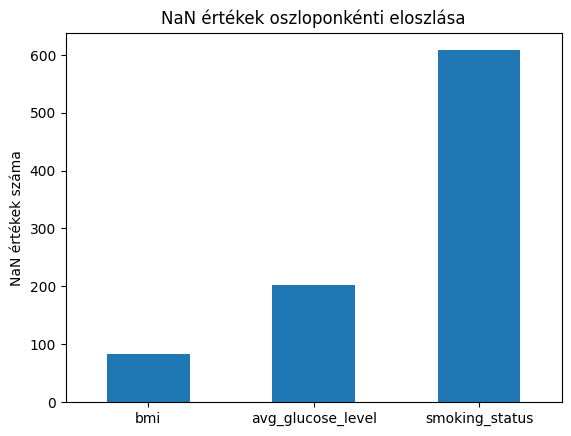

In [114]:
összes_nan = sampled_data.isna().sum().sum() # az összes NaN érték
print(f'Az össze Nan a halmazban: {összes_nan}')

Nan_dict = {}
for i in sampled_data.columns:
    if sampled_data[i].isna().sum() > 0:
        Nan_dict[i] = int(sampled_data[i].isna().sum())

temp2 = 0
for i, j in Nan_dict.items():
    temp2 += j
if temp2 != összes_nan:
    print('A NaN értékek nem egyeznek meg!')

print(f'\nNanok száma egyes oszlopokban:')
for i,j in Nan_dict.items():
    print(f'{i}: {j}')


Nan_pd=pd.DataFrame.from_dict(Nan_dict, orient='index')
Nan_pd_sorted = Nan_pd.sort_values(by=0, ascending=True)
plot = Nan_pd_sorted.plot(kind='bar', legend=False, ylabel='NaN értékek száma', title='NaN értékek oszloponkénti eloszlása')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)



## 2.5 feladat
- Egyes adott agekhez mennyi sor tartozik? -> hisztogrammon kell ezt ábrázolni
### 2.5.1
- hisztogrammot kell csinálni <br> kategóriák: munka, <br> érték: életkor, <br> hol kell ezt vizsgálni: ahol strokeot kaptak, <br> Következetesen akkor 3 különböző hisztogrammot kell készíteni

age
82.00    29
81.00    30
80.00    29
79.00    35
78.00    54
         ..
0.56      2
0.40      1
0.32      3
0.24      2
0.16      1
Name: count, Length: 98, dtype: int64


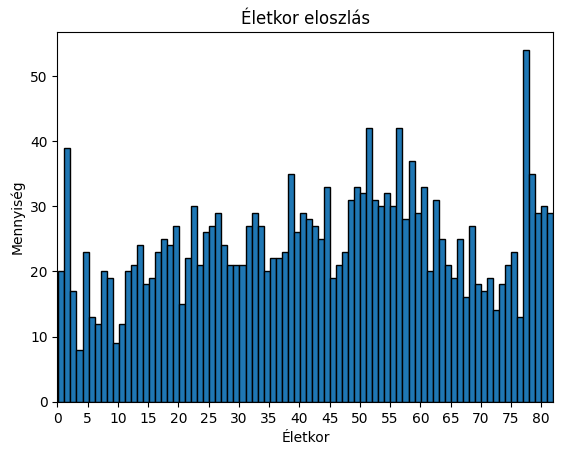

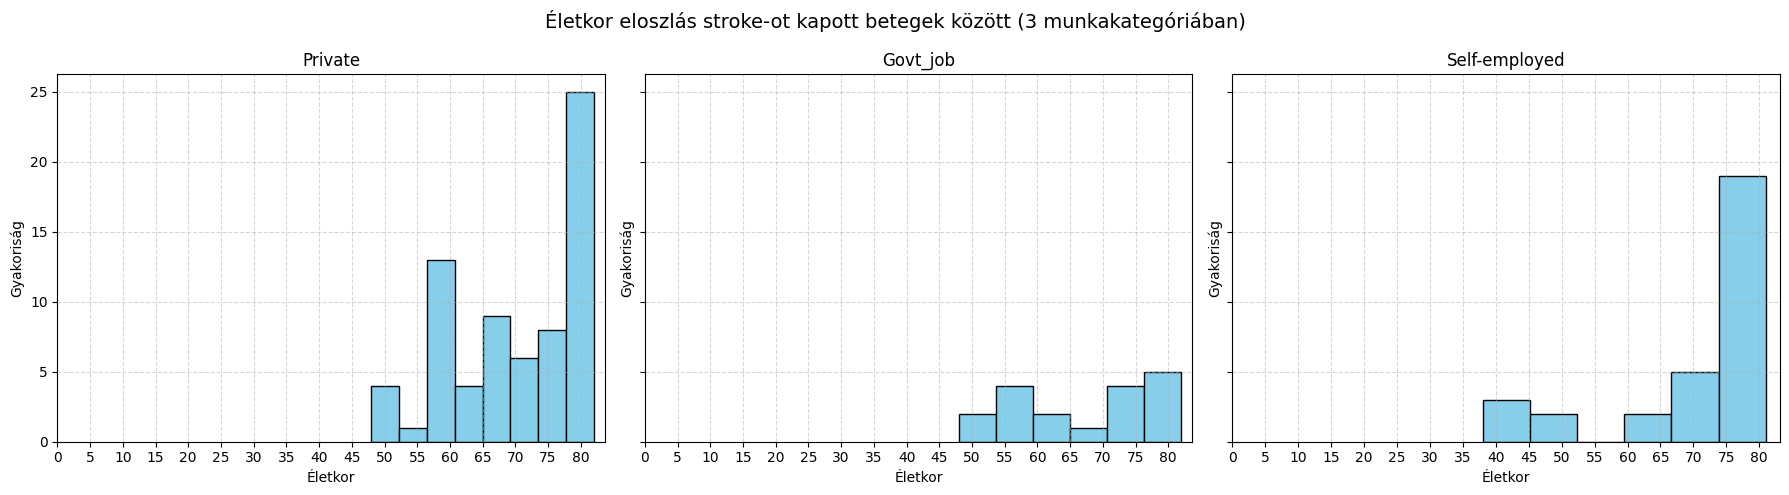

In [ ]:
egyes_életkorok = sampled_data['age'].value_counts().sort_index(ascending=False)
print(egyes_életkorok)

# Hisztogram ábrázolása
sampled_data['age'].plot(
    kind='hist',
    bins=int(max(sampled_data['age'])), 
    ylabel='Mennyiség',
    title='Életkor eloszlás',
    xlabel='Életkor',
    edgecolor='black'
)

plt.xticks(np.arange(0, max(sampled_data['age']), 5)) 
plt.xlim(0, max(sampled_data['age']))  
plt.show()

stroke_filter = sampled_data[sampled_data['stroke'] == 1]
work_type_list = stroke_filter['work_type'].unique()

for i in range(len(work_type_list)):
    if work_type_list[i] == 'children':
        work_type_list = np.delete(work_type_list, i)


# 3. Ábra létrehozása
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, kategoria in enumerate(work_type_list):
    adat = stroke_filter[stroke_filter['work_type'] == kategoria]
    axs[i].hist(adat['age'].dropna(), bins='auto', edgecolor='black', color='skyblue') # Itt a bins = 'auto', ami azt jelenti hogy a csoportok ábrázolása automatikus, ami pontatlan, hogyan lehetne ezt kicserélni egy konkrélt értékkel? 
    axs[i].set_title(f'{kategoria}')
    axs[i].set_xlabel('Életkor')
    axs[i].set_ylabel('Gyakoriság')
    axs[i].set_xticks(np.arange(0, max(stroke_filter['age']), 5))
    axs[i].grid(True, linestyle='--', alpha=0.5)

fig.suptitle(f'Életkor eloszlás stroke-ot kapott betegek között ({len(work_type_list)} munkakategóriában)', fontsize=14)
plt.tight_layout()
plt.show()


## 2.6 feladat
- 2.6.1